## 싸인 함수 회귀분석 (Sine Regression)

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.0.0


## 데이터 생성

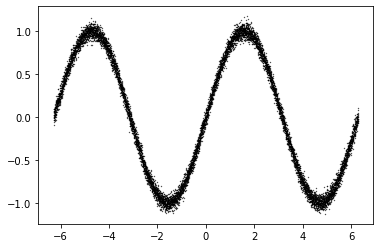

In [13]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의

In [15]:
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=[1]),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1)
])

## 모델 훈련

In [25]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

model.fit(inputs, outputs, epochs=20)

Train on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 90us/sample - loss: 0.0038 - mae: 0.0487 - mse: 0.0038
Epoch 2/20
10000/10000 [==============================] - 1s 53us/sample - loss: 0.0035 - mae: 0.0471 - mse: 0.0035
Epoch 3/20
10000/10000 [==============================] - 0s 48us/sample - loss: 0.0034 - mae: 0.0464 - mse: 0.0034
Epoch 4/20
10000/10000 [==============================] - 0s 50us/sample - loss: 0.0034 - mae: 0.0459 - mse: 0.0034
Epoch 5/20
10000/10000 [==============================] - 0s 50us/sample - loss: 0.0034 - mae: 0.0457 - mse: 0.0034
Epoch 6/20
10000/10000 [==============================] - 1s 52us/sample - loss: 0.0033 - mae: 0.0456 - mse: 0.0033
Epoch 7/20
10000/10000 [==============================] - 1s 50us/sample - loss: 0.0033 - mae: 0.0454 - mse: 0.0033
Epoch 8/20
10000/10000 [==============================] - 0s 49us/sample - loss: 0.0032 - mae: 0.0450 - mse: 0.0032
Epoch 9/20
10000/10000 [=========================

In [26]:
test_loss, test_mse, test_mae = model.evaluate(inputs, outputs, verbose=0)
print('\n테스트 MSE:', test_mse)


테스트 MSE: 0.046272732


## 테스트

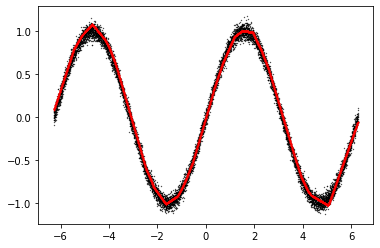

In [28]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)